# **AP157 Machine Learning Lab Assignment**
## Module 1: Regression -- Overfitting, Underfitting, and Cross-Validation


_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


DISCUSSION

Examining the equations given, it can be inferred that the data will not be linear. Thus we cannot make use of its best-fit line, otherwise it would result in underfitting (high bias).

Generating the data, we use NumPy's linspace and `random.normal` functions. For the x values, we just simply generate 100 regularly-spaced points between 0 and 3, while for the y values, we make use of the random function and use the equation given. We also make use of the `random.seed(0)` function to ensure that the same set of random numbers would be used in each run.

Looking at the figure generated, we see that indeed, the data is not linear. Compairng the figure to Fig. 4.12 from the text book, we see that there are more points in our plot since we generated 100 points, whereas the book only accounted for 20.

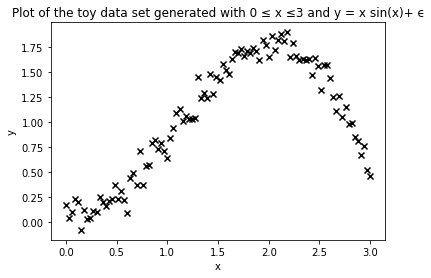

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# We make use of NumPy's np.linspace to generate 100 regularly-spaced points between 0 and 3 for x_i
X = np.linspace(0, 3, 100)

# We use np.random.normal for y_i with noise drawn from a normal distribution N(0, 0.1)
def f(X):
  return np.random.normal(X*np.sin(X), 0.1)

np.random.seed(0) # so that the same set of random numbers would be used

# Plot the toy data set
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X, f(X), c='black', marker='x') #similar style to Fig 8.12
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Plot of the toy data set generated with 0 ≤ x ≤3 and y = x sin(x)+ ϵ")

plt.show()

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


**DISCUSSION**

Cross-validation (CV) is a technique to quantitatively evaluate the bias or variance ofresulting in a good learning and prediction model. In cross-validation, we evaluate the error of the CV set, which we did not use in making the fit, thereby making it a good representative of data from the real world that we will feed to our models later on.

For our activity, we divide the toy dataset into three: training, test, and validation data. However, since Sklearn only allows us to split it into two, thus we create two steps, the first one is to divide the original dataset evenly into the training and testing dataset. Now, our test and training sets have 50% each. We further split the test dataset into the final test set and the validation set, thus they have 25% of the original data each.

We then get the best-fit curve for the training set using NumPy's `polyfit` function, and get its root-mean-square (RMS) error of the training set and cross-validation error. We expect the CV error to be greater than the training set error since we did not use it in fitting the data.



Text(0.5, 1.0, "Toy model's rms error and cross validation error VS the polynomial degree d")

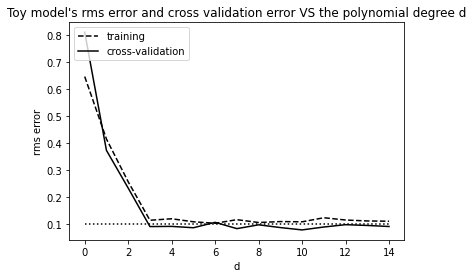

In [ ]:
# Making use of Sklearn library's function
from sklearn.model_selection import train_test_split

# Since we cannot split data sets into three using Sklearn, we first split it into two sets: test and train sets, 50% each
X_train, X_test, y_train, y_test = train_test_split(X, f(X), test_size=0.5, random_state= 1)

# Now, we split the training set from before to train and validation sets, 25% each
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 1)

# We need to create empty arrays for training and validation sets so that we can insert their rms values for plotting
d = np.arange(0,15) # d = 0 to 14
train_rms = np.zeros(len(d))
val_rms = np.zeros(len(d))

# We use a for loop to get the rms and best-fit curve for polynomial degrees d = 0 to 14
for i in range(len(d)):
    p = np.polyfit(X, f(X), d[i]) # get the best-fit curve
    train_rms[i] = np.sqrt(np.sum((np.polyval(p, X_train) - y_train) ** 2)/len(y_train)) # get the rms error for training set
    val_rms[i] = np.sqrt(np.sum((np.polyval(p, X_val) - y_val) ** 2)/len(y_val)) # get the rms error for validation set

# We account for the intrinsic scatter using the noise in the first part ϵi∼N(0,0.1)
scatter = [0.1] * len(d)

# Plot the rms errors for both training and validation sets
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(d, train_rms, '--k', label='training') # training set
ax.plot(d, val_rms, '-k', label='cross-validation') # cross-validation
ax.plot(d, scatter, ':k') # intrinsic scatter
ax.set_xlabel('d')
ax.set_ylabel('rms error')
ax.legend(loc=2)
ax.set_title("Toy model's rms error and cross validation error VS the polynomial degree d")


The plot above shows the RMS and CV errors and intrinsic scatter of our model. We see that at polynomial degree less than 3, the error for both sets are at a peak. As expected, the CV has a greater error, at around 0.6 at polynomial degree d=1, meanwhile, the training set rms error is around 0.4 at d = 1.

At $d \geq 3$, the RMS and CV errors are now closer to the instrinsic scatter. This goes to show that at higher d's, the error of the model will be minimized. However, as mentioned earlier, we should be careful in increasing our polynomial degree so as not to overfit our data. In the figure above, we see that choosing d = 3 is a good fit to our data.

We try to make use of this in getting the best fit curve for our plot.

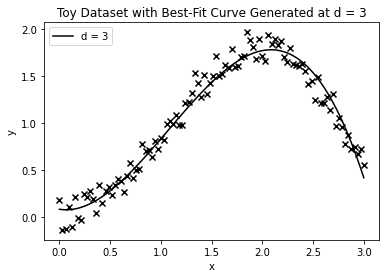

In [ ]:
# We make use of NumPy's np.linspace to generate 100 regularly-spaced points between 0 and 3 for x_i
X = np.linspace(0, 3, 100)

# We use np.random.normal for y_i with noise drawn from a normal distribution N(0, 0.1)
def f(X):
  return np.random.normal(X*np.sin(X), 0.1)

np.random.seed(0) # so that the same set of random numbers would be used

# Plot the toy data set
fig = plt.figure()
p = np.polyfit(X, f(X), 3) # best-fit curve at d=3
yp = np.poly1d(p)

ax = fig.add_subplot(111)
ax.scatter(X, f(X), c='black', marker='x') #similar style to Fig 8.12
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Plot of the toy data set generated with 0 ≤ x ≤3 and y = x sin(x)+ ϵ")

# Plot of the curve
plt.plot(X,yp(X), 'black')
plt.legend(['d = 3'], loc = 2)
plt.title('Toy Dataset with Best-Fit Curve Generated at d = 3')
plt.show()

In the figure above, we have generated the best-fit curve for the dataset. By using cross-validation, we did not need to guess the best polynomial degree to use, which saves us the risk of overfitting or undefitting our data.

For future work, it is important to have a lot of data so that our model would be able to learn more and be able to predict well in real life situations.